<a href="https://colab.research.google.com/github/Ernesto43010/PROJECTS-EDA/blob/main/Practica_2_Flights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AEROPUERTO

# Sección nueva

Ahora es tu turno de analizar un banco de datos del mundo real que contiene datos de vuelos del Departamento de Transporte de Estados Unidos

Primero carga y visualiza los datos. (flights.csv)

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from collections import Counter
import collections

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
flights = pd.read_csv('/content/drive/MyDrive/Classroom/Desarrollo de Aplicaciones  para Análisis de Datos/flights.csv')
flights

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0


El banco de datos contiene observaciones de los vuelos nacionales estadounidenses en 2013 y consta de los siguientes campos:
- **Año**: El año del vuelo (todos los registros son de 2013).
- **Mes**: El mes del vuelo
- **DayofMonth** (día del mes): El día del mes en el que salió el vuelo
- **Día de la semana**: El día de la semana en que salió el vuelo - del 1 (lunes) al 7 (domingo)
- **Compañía aérea**: La abreviatura de dos letras de la compañía aérea.
- **OriginAirportID**: Identificador numérico único del aeropuerto de salida.
- **OriginAirportName**: El nombre completo del aeropuerto de salida
- **OriginCity** (Ciudad de origen): Ciudad del aeropuerto de salida
- **OriginState**: Estado del aeropuerto de salida Estado del aeropuerto de salida
- **DestAirportID**: Identificador numérico único del aeropuerto de destino
- **DestAirportName**: El nombre completo del aeropuerto de destino
- **DestCity**: La ciudad del aeropuerto de destino
- **DestState**: El estado del aeropuerto de destino
- **CRSDepTime**: La hora de salida programada
- **DepDelay**: El número de minutos que se retrasó la salida (los vuelos que salieron antes de lo previsto tienen un valor negativo)
- **DelDelay15**: Un indicador binario de que la salida se retrasó más de 15 minutos (y por lo tanto se considera "tarde")
- **CRSArrTime**: La hora de llegada programada
- **ArrDelay**: El número de minutos que se retrasó la lleg

Lo que se tiene que hacer en esta práctica es explorar los datos de vuelo para analizar los posibles factores que afectan a los retrasos en la salida o llegada de un vuelo.

 1. Empieza con limpiar los datos.
     - Identifica los datos nulos o ausentes e imputa los valores de sustitución adecuados.
     - Identifica y elimina cualquier valor atípico en las columnas *DepDelay* y *ArrDelay*.
             - Tips:
            - Primero visualiza la distribución de las columnas
            - Define donde se observan los valores atipicos
            - Recorta los datos de tal forma que los percentiles esten entre 1 y 90
 2. Explora los datos limpios.
     - Consulta las estadísticas de resumen de los campos numéricos del conjunto de datos.
     - Determina la distribución de las columnas *DepDelay* y *ArrDelay*.
     - Utiliza estadísticas, funciones de agregación y visualización para responder a las siguientes preguntas:
         - *¿Cuáles son los promedios (mean) de salida y llegada?*
         - *¿Cómo se comparan las compañías en cuanto a retrasos en las llegadas?*
         - *¿Hay días de la semana más propensos a las llegadas que otros?*
         - *¿Cuál es el aeropuerto de salida con mayor retraso medio?*
         - *¿Las salidas tardías suelen provocar mayores retrasos en las llegadas que las salidas puntuales?*
         - *¿Qué ruta (del aeropuerto de origen al aeropuerto de destino) tiene más llegadas con retraso?*
         - *¿Qué ruta tiene el mayor retraso medio de llegada?*

# LIMPIEZA DE DATOS


In [ ]:
print(f'Numero de datos antes de la limpieza {len(flights)}')

Numero de datos antes de la limpieza 271940


In [ ]:
# Datos nulos
flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [ ]:
'''Como se observa tenemos 2761 datos nulos en la columna que nos indica que tiene un retras de mas de 15 min y por eso se le asigna un 1 para saber si salio tarde
o un 0 para decir que no.
Haremos una copia de nuestro csv pero con los nulos, y veremos en la columna que nos indica con un 0 o un 1 si llegaron tarde y asi poder tomar la dessicion de como rellenarlos
'''
flights_nulos = flights[(flights['DepDel15'].isnull())]
flights_nulos['DepDelay'].unique()

array([0])

In [ ]:
# Como nos indica que tiene puros, podemos decir que pues no tienen nada de retraso, asi que podemos rellenar la columna con 0.
flights['DepDel15'].fillna(0, inplace=True)
flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

# DATOS DUPLICADOS

In [ ]:
# No tenemos datos duplicados
flights.duplicated().sum()

0

# VALORES ATIPICOS

In [ ]:
flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.199092,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.399318,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


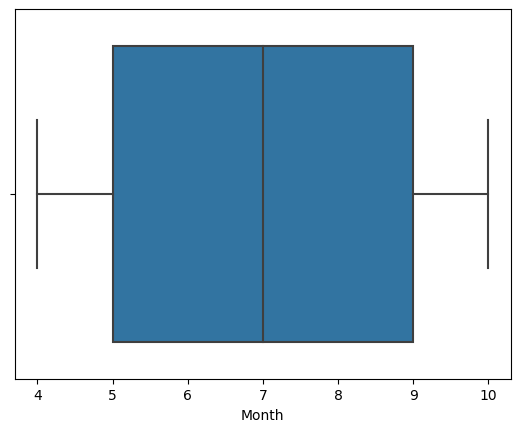

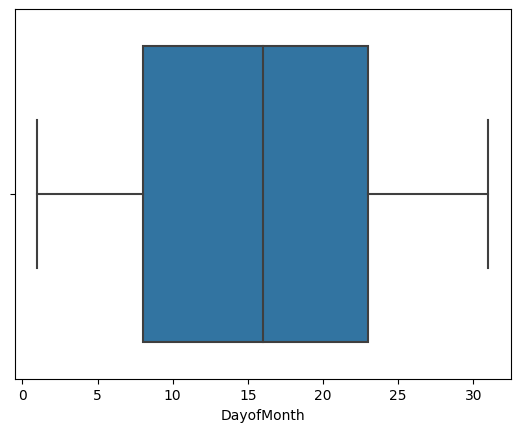

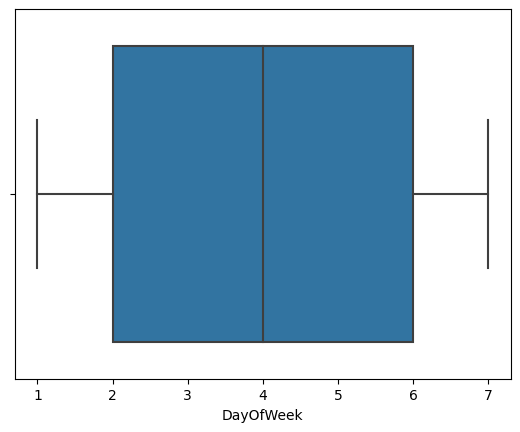

In [ ]:
# Primer veremos si tenemos algun valor atipico en las columnas de Mes, Dia, Dia de la semana, por si acaso
sns.boxplot(x='Month', data=flights)
plt.show()
sns.boxplot(x='DayofMonth', data=flights)
plt.show()
sns.boxplot(x='DayOfWeek', data=flights)
plt.show()
# Como vemos no tenemos nigun valor raro en estas columnas que nos impida responder preguntas despues

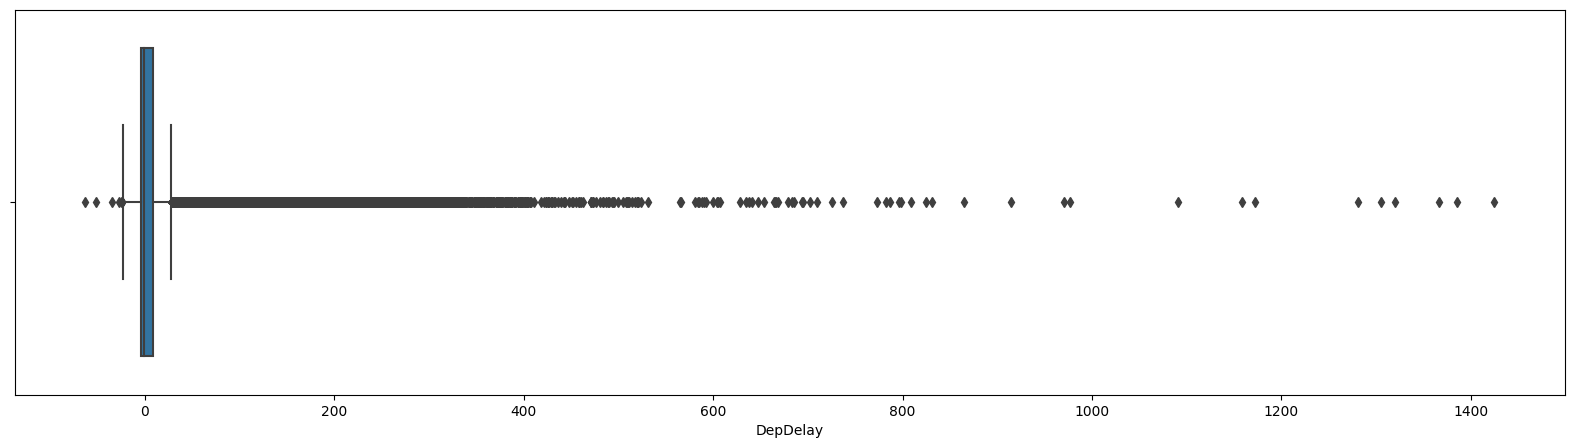

In [ ]:
# Ahora nos enfocaremos mas en las columnas de los tiempos en que se tardan mas en llegar o despegar
plt.figure(figsize=(20,5))
sns.boxplot(x='DepDelay', data=flights)
plt.show()

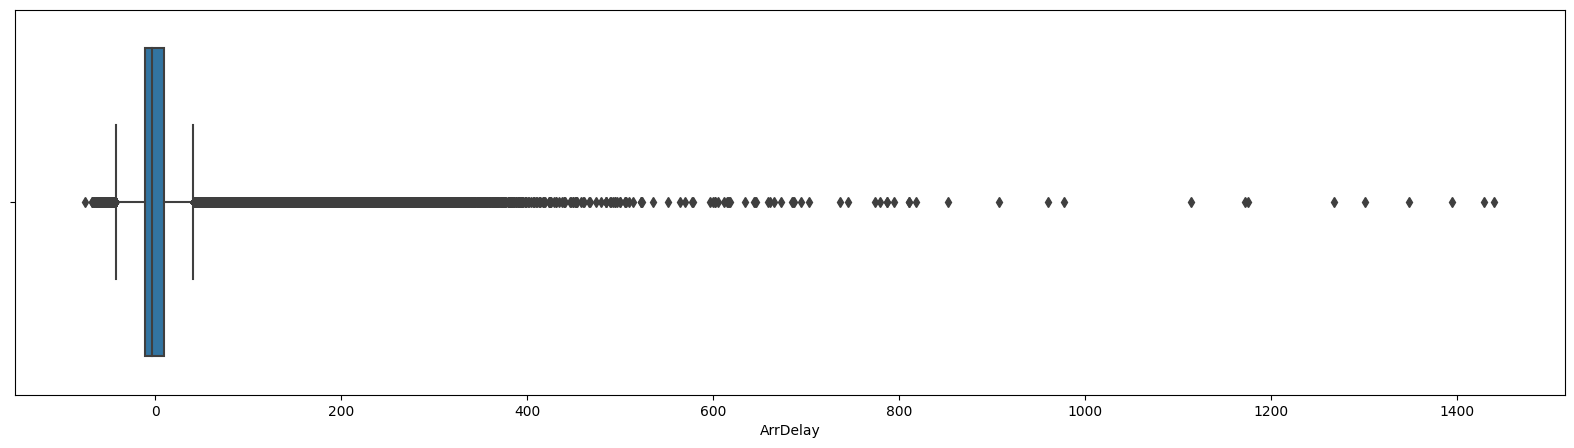

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x='ArrDelay', data=flights)
plt.show()

Aunque como vemos que si hay vuelos con un retraso mayor, (casi llegando a un dia), es algo que no pasa con frecuencia pero que si puede llegar a suceder, y es raro ya que no se cancelan, al contrario hay vuelos que tienen menos horas de retraso y esos si se cancelan

In [ ]:
flights.loc[(flights['DepDelay']>1000)&(flights['Cancelled']==1)]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled


In [ ]:
flights.loc[(flights['DepDelay']>20)&(flights['Cancelled']==1)].head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
638,2013,8,30,5,EV,10693,Nashville International,Nashville,TN,12264,Washington Dulles International,Washington,DC,1315,245,1.0,1605,0,1,1
3277,2013,8,8,4,MQ,14492,Raleigh-Durham International,Raleigh/Durham,NC,12953,LaGuardia,New York,NY,1415,49,1.0,1550,0,1,1
3367,2013,7,22,1,UA,13930,Chicago O'Hare International,Chicago,IL,12953,LaGuardia,New York,NY,1400,80,1.0,1712,0,1,1
6942,2013,7,22,1,YV,11057,Charlotte Douglas International,Charlotte,NC,12953,LaGuardia,New York,NY,1500,45,1.0,1649,0,1,1
7025,2013,4,10,3,UA,13204,Orlando International,Orlando,FL,11618,Newark Liberty International,Newark,NJ,1944,75,1.0,2229,0,1,1


# PERCENTILES ENTRE 1 Y 90

Los percentiles son útiles para comprender la distribución de un conjunto de datos. Por ejemplo, si estás analizando las puntuaciones en un examen y el percentil 90 es 85, significa que el 90% de los estudiantes obtuvo una puntuación igual o inferior a 85 en ese examen.

In [ ]:
p1Dep = flights['DepDelay'].quantile(0.01)
p90Dep = flights['DepDelay'].quantile(0.90)
p1Arr = flights['ArrDelay'].quantile(0.01)
p90Arr = flights['ArrDelay'].quantile(0.90)

p1Dep, p90Dep, p1Arr, p90Arr

(-12.0, 37.0, -33.0, 38.0)

In [ ]:
#Filas que están dentro del rango de percentiles
flights_recortado = flights[((flights["ArrDelay"] >= p1Arr) & (flights["ArrDelay"] <= p90Arr)) & (flights["DepDelay"] >= p1Dep) & (flights["DepDelay"] <= p90Dep)]

In [ ]:
print(f'El numero de datos que teniamos antes era de {len(flights)}, despues de recortarlos nos quedaron de {len(flights_recortado)} \
en total borramos {len(flights)-len(flights_recortado)} datos')

El numero de datos que teniamos antes era de 271940, despues de recortarlos nos quedaron de 237105 en total borramos 34835 datos


Con base en los percentiles, podemos decir que el 1% de los datos de despegue es menor a -12 osea que rara vez salen antes.

y que el 90% de los retrasos en la salida son iguales o menores que 37 minutos.

Despues con los de llegada solo el 1% llega antes de -33
y que el 90% se tarda en llegar aproximadamente 38 minutos o menos


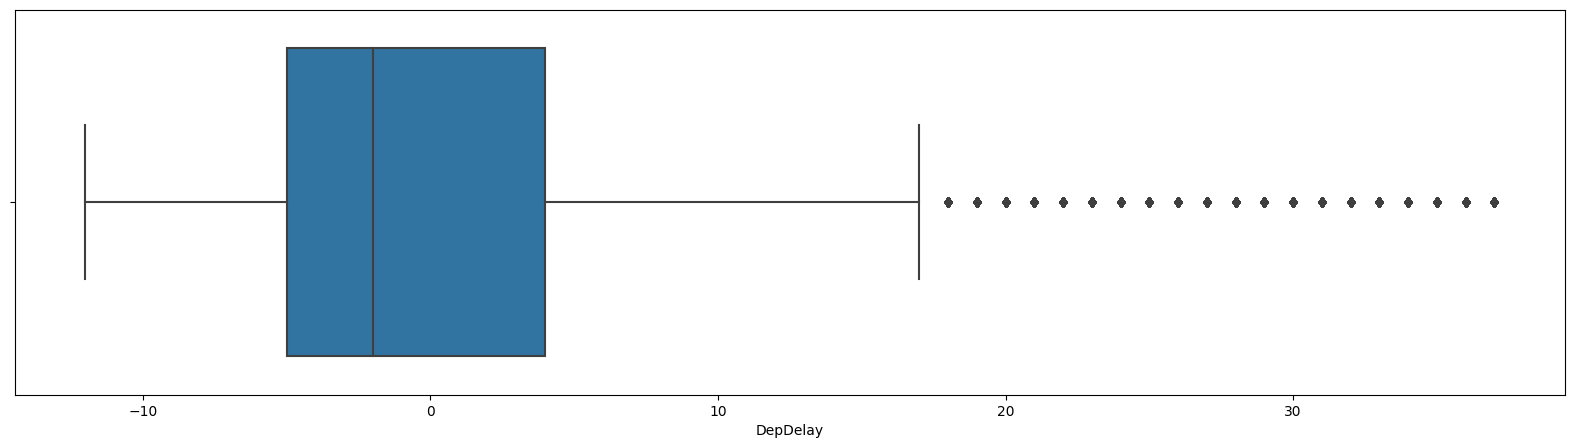

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x='DepDelay', data=flights_recortado)
plt.show()

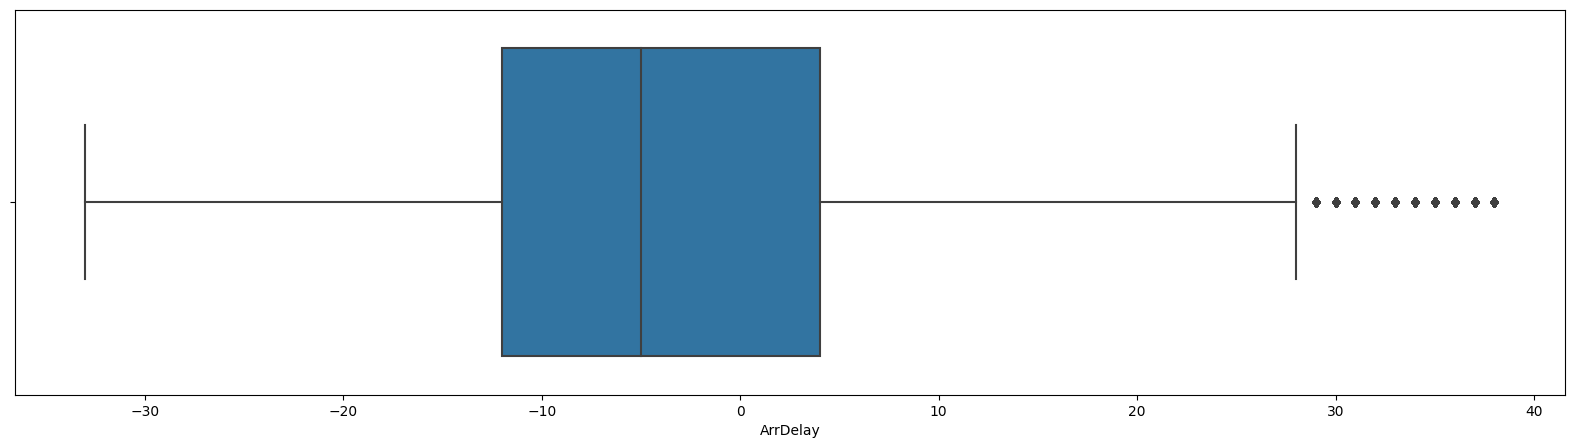

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x='ArrDelay', data=flights_recortado)
plt.show()

In [ ]:
flights_recortado.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,237105.0,237105.000000,237105.000000,237105.000000,237105.000000,237105.000000,237105.000000,237105.000000,237105.000000,237105.000000,237105.000000,237105.000000,237105.000000
mean,2013.0,7.013273,15.810928,3.902874,12752.857915,12736.206525,1298.594285,1.312984,0.105299,1480.039135,-3.090745,0.118382,0.012041
std,0.0,2.000212,8.839397,1.993387,1508.288380,1505.759473,469.885789,9.331688,0.306939,488.723238,13.142272,0.323061,0.109069
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-12.000000,0.000000,1.000000,-33.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,900.000000,-5.000000,0.000000,1105.000000,-12.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1255.000000,-2.000000,0.000000,1501.000000,-5.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1705.000000,4.000000,0.000000,1900.000000,4.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,37.000000,1.000000,2359.000000,38.000000,1.000000,1.000000


# DISTRIBUCION

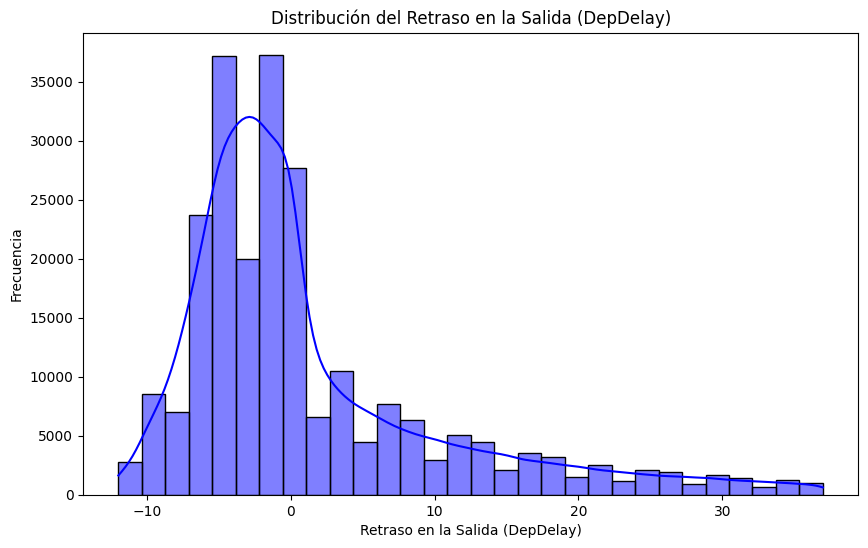

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(flights_recortado['DepDelay'], kde=True, bins=30, color='blue')

plt.xlabel('Retraso en la Salida (DepDelay)')
plt.ylabel('Frecuencia')
plt.title('Distribución del Retraso en la Salida (DepDelay)')

plt.show()

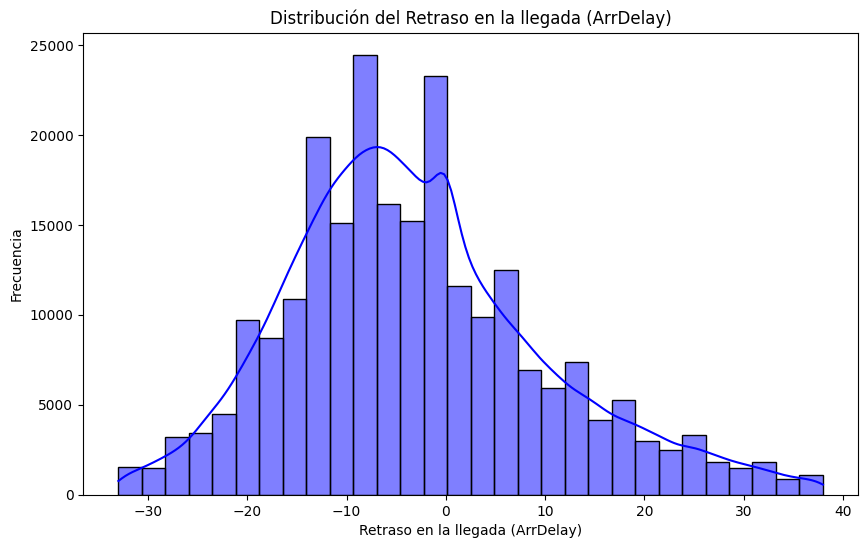

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(flights_recortado['ArrDelay'], kde=True, bins=30, color='blue')

plt.xlabel('Retraso en la llegada (ArrDelay)')
plt.ylabel('Frecuencia')
plt.title('Distribución del Retraso en la llegada (ArrDelay)')

plt.show()

# ¿Cuáles son los promedios (mean) de salida y llegada?

In [ ]:
print(f"El promedio de los minutos de salida es de: {flights_recortado['DepDelay'].mean()}")
print(f"El promedio de los minutos de lleagda es de: {flights_recortado['ArrDelay'].mean()}")

El promedio de los minutos de salida es de: 1.3129836992049935
El promedio de los minutos de lleagda es de: -3.0907446068197633


# ¿Cómo se comparan las compañías en cuanto a retrasos en las llegadas?

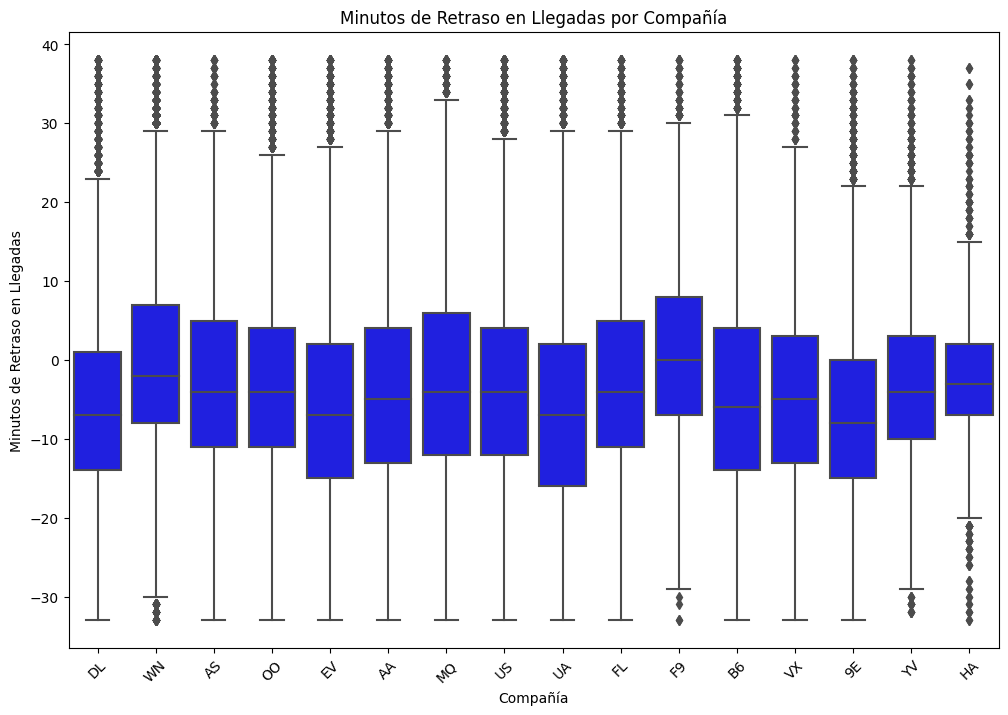

In [ ]:
plt.figure(figsize=(12, 8))

sns.boxplot(x=flights_recortado['Carrier'], y=flights_recortado['ArrDelay'], color='blue')

plt.xlabel('Compañía')
plt.ylabel('Minutos de Retraso en Llegadas')
plt.title('Minutos de Retraso en Llegadas por Compañía')

plt.xticks(rotation=45)
plt.show()

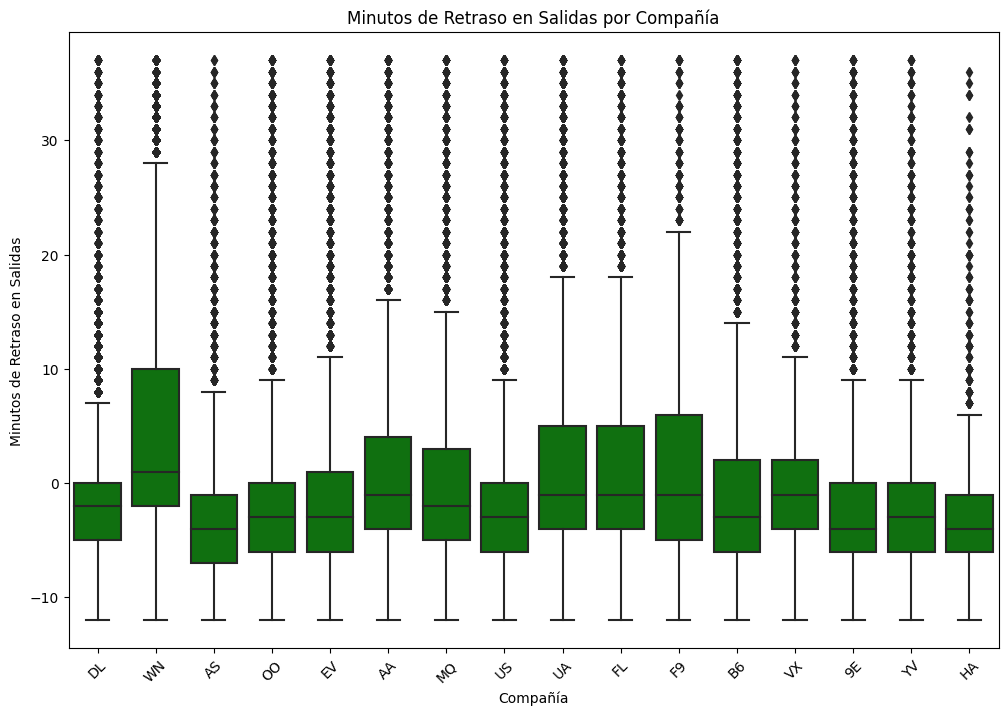

In [ ]:
plt.figure(figsize=(12, 8))

sns.boxplot(x=flights_recortado['Carrier'], y=flights_recortado['DepDelay'], color='green')

plt.xlabel('Compañía')
plt.ylabel('Minutos de Retraso en Salidas')
plt.title('Minutos de Retraso en Salidas por Compañía')

plt.xticks(rotation=45)
plt.show()

# ¿Hay días de la semana más propensos a las llegadas que otros?

In [ ]:
no_cancelados = flights_recortado.loc[flights_recortado['Cancelled']==0]

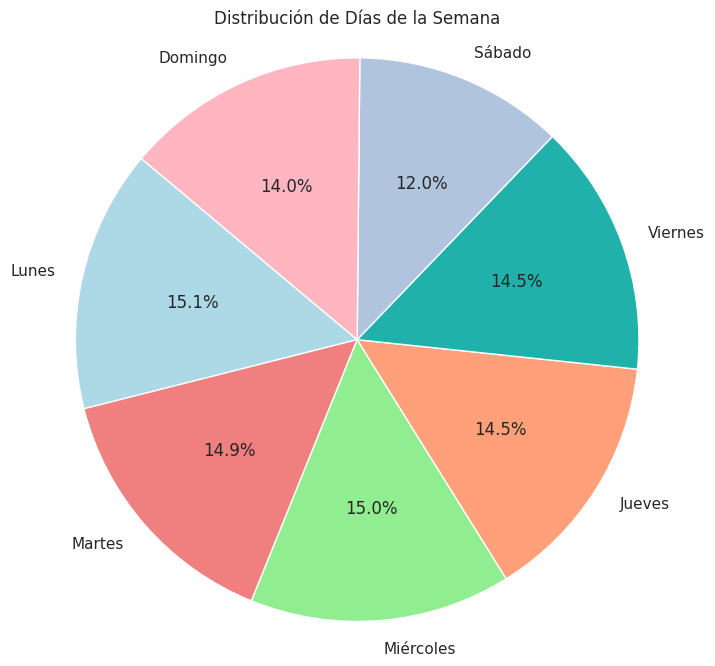

In [ ]:
dias = no_cancelados['DayOfWeek'].tolist()
nombres_dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
# Cuenta la frecuencia de cada día
conteo_dias = collections.Counter(dias)

# Separa las frecuencias y los nombres de los días
frecuencias = [conteo_dias[dia] for dia in range(1, 8)]
nombres_frecuencias = [nombres_dias_semana[dia - 1] for dia in range(1, 8)]

# Colores para las secciones del gráfico de pastel
colores = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen', 'lightsteelblue', 'lightpink']

# Crea el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(frecuencias, labels=nombres_frecuencias, colors=colores, autopct='%1.1f%%', startangle=140)

plt.axis('equal')  # Para asegurarse de que el gráfico sea un círculo
plt.title('Distribución de Días de la Semana')

plt.show()

# ¿Cuál es el aeropuerto de salida con mayor retraso medio?

Con base en que nos dio lo mismo, es que todas las compañias tienen un retraso mayor que a la media.


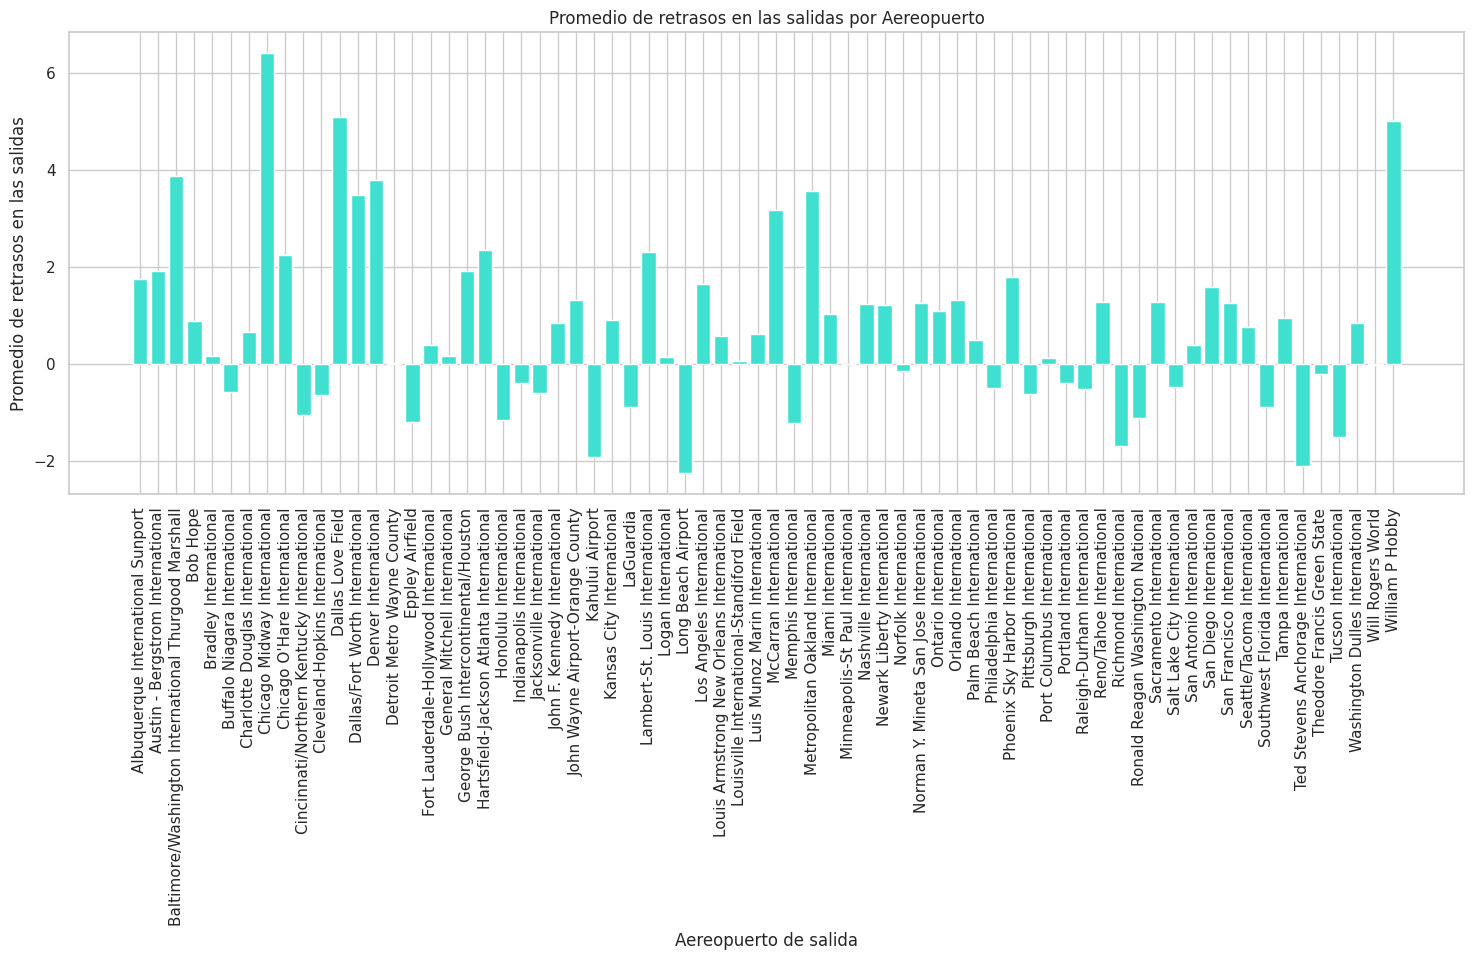

In [ ]:
promedioAeroSalida = flights_recortado.groupby('OriginAirportName')['DepDelay'].mean().reset_index()

plt.figure(figsize=(18, 6))
plt.bar(promedioAeroSalida['OriginAirportName'], promedioAeroSalida['DepDelay'], color='turquoise')
plt.xlabel('Aereopuerto de salida')
plt.ylabel('Promedio de retrasos en las salidas')
plt.title('Promedio de retrasos en las salidas por Aereopuerto')
plt.xticks(rotation=90)
plt.show()

# ¿Las salidas tardías suelen provocar mayores retrasos en las llegadas que las salidas puntuales?

Para poder observar esto, filtraremos primero los vuelos que salen tarde y que llegaron tarde.

Despues compararemos las salidas a tiempo, con 0 min de retraso para ver si llegan puntuales

In [ ]:
Salen_Tarde = flights_recortado.loc[(flights_recortado['DepDel15']==1)&(flights_recortado['ArrDel15']==1)&((flights_recortado['Cancelled']==0))]
print(f'El numero de los vuelos que salen tarde y llegan tarde son {len(Salen_Tarde)}')
Salen_Temprano = flights_recortado.loc[(flights_recortado['DepDel15']==0)&(flights_recortado['ArrDel15']==1)&((flights_recortado['Cancelled']==0))]
print(f'El numero de los vuelos que salen temprano y llegan tarde son {len(Salen_Temprano)}')

El numero de los vuelos que salen tarde y llegan tarde son 14299
El numero de los vuelos que salen temprano y llegan tarde son 10915


In [ ]:
Salen_Tarde.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,14299.0,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.0,14299.000000,14299.000000,14299.0,14299.0
mean,2013.0,6.918806,16.058256,3.892160,12715.379677,12840.919085,1512.084621,25.669837,1.0,1668.130219,23.868942,1.0,0.0
std,0.0,1.908099,8.595243,1.929367,1496.218868,1519.721340,416.855883,6.304598,0.0,472.388591,6.241046,0.0,0.0
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,5.000000,15.000000,1.0,1.000000,15.000000,1.0,0.0
25%,2013.0,5.000000,9.000000,2.000000,11292.000000,11292.000000,1215.000000,20.000000,1.0,1402.000000,19.000000,1.0,0.0
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12953.000000,1540.000000,26.000000,1.0,1735.000000,23.000000,1.0,0.0
75%,2013.0,8.000000,23.000000,5.000000,13931.000000,14107.000000,1840.000000,31.000000,1.0,2030.000000,28.000000,1.0,0.0
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,37.000000,1.0,2359.000000,38.000000,1.0,0.0


In [ ]:
Salen_Temprano.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,10915.0,10915.000000,10915.000000,10915.000000,10915.000000,10915.000000,10915.000000,10915.000000,10915.0,10915.000000,10915.000000,10915.0,10915.0
mean,2013.0,6.814017,15.797893,3.878149,12721.503069,12651.288136,1338.318461,2.774347,0.0,1548.679798,21.733852,1.0,0.0
std,0.0,1.953051,8.757960,1.949564,1449.955780,1474.846753,454.608099,6.586001,0.0,474.070574,5.988565,0.0,0.0
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,5.000000,-12.000000,0.0,1.000000,15.000000,1.0,0.0
25%,2013.0,5.000000,9.000000,2.000000,11292.000000,11292.000000,938.000000,-3.000000,0.0,1200.000000,17.000000,1.0,0.0
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12889.000000,1340.000000,2.000000,0.0,1610.000000,20.000000,1.0,0.0
75%,2013.0,8.000000,23.000000,5.000000,14027.000000,13930.000000,1720.000000,9.000000,0.0,1930.000000,25.000000,1.0,0.0
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,14.000000,0.0,2359.000000,38.000000,1.0,0.0


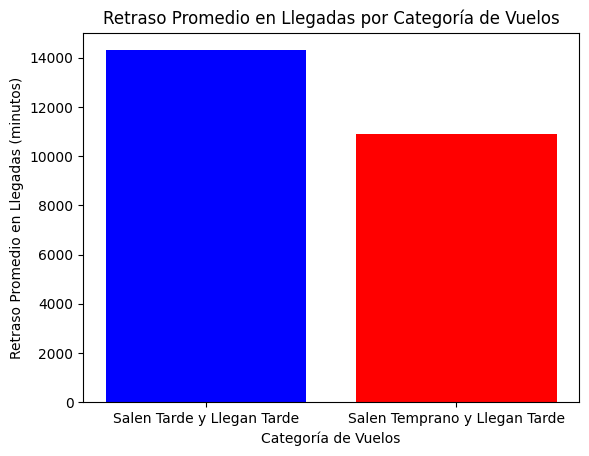

In [ ]:
etiquetas = ['Salen Tarde y Llegan Tarde', 'Salen Temprano y Llegan Tarde']
valores = [len(Salen_Tarde), len(Salen_Temprano)]
colores = ['blue', 'red']

plt.bar(etiquetas, valores, color=colores)

plt.title('Retraso Promedio en Llegadas por Categoría de Vuelos')
plt.xlabel('Categoría de Vuelos')
plt.ylabel('Retraso Promedio en Llegadas (minutos)')

plt.show()

# ¿Qué ruta (del aeropuerto de origen al aeropuerto de destino) tiene más llegadas con retraso?

In [ ]:
Id_O_Aero = (flights_recortado['OriginAirportID']).tolist()
Id_D_Aero = (flights_recortado['DestAirportID']).tolist()

237105

In [ ]:
flights_recortado

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271933,2013,10,29,2,US,13930,Chicago O'Hare International,Chicago,IL,14100,Philadelphia International,Philadelphia,PA,1345,-6,0.0,1645,-11,0,0
271934,2013,4,13,6,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,13204,Orlando International,Orlando,FL,1335,-7,0.0,1705,-12,0,0
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0


In [ ]:
# Calcula la moda de cada ID y cuenta su frecuencia
for i in set(Id_O_Aero):  # Utiliza set() para obtener valores únicos de la lista
    frecuencia = Id_O_Aero.count(i)
    moda = statistics.mode([x for x in Id_O_Aero if x == i])
    print(f'El ID {i} aparece {frecuencia}')

El ID 13830 aparece 1052
El ID 14730 aparece 970
El ID 12173 aparece 1588
El ID 13198 aparece 2736
El ID 11278 aparece 3722
El ID 15376 aparece 996
El ID 13204 aparece 5321
El ID 14869 aparece 4329
El ID 14100 aparece 4024
El ID 12953 aparece 4728
El ID 12954 aparece 758
El ID 14107 aparece 8233
El ID 11292 aparece 8314
El ID 14747 aparece 5533
El ID 10397 aparece 13369
El ID 12191 aparece 2569
El ID 13342 aparece 1839
El ID 10529 aparece 1200
El ID 11298 aparece 8923
El ID 11042 aparece 2159
El ID 10140 aparece 1647
El ID 12451 aparece 1267
El ID 10792 aparece 1322
El ID 11433 aparece 5516
El ID 14122 aparece 1846
El ID 15016 aparece 2931
El ID 14635 aparece 1099
El ID 14893 aparece 2302
El ID 13487 aparece 5411
El ID 13232 aparece 4225
El ID 11057 aparece 6768
El ID 10800 aparece 1295
El ID 14771 aparece 7124
El ID 12339 aparece 1628
El ID 11697 aparece 2945
El ID 13871 aparece 1206
El ID 14843 aparece 1186
El ID 13495 aparece 2281
El ID 10423 aparece 2368
El ID 11066 aparece 1496
El

In [ ]:
for i in set(Id_D_Aero):  # Utiliza set() para obtener valores únicos de la lista
    frecuencia = Id_O_Aero.count(i)
    moda = statistics.mode([x for x in Id_O_Aero if x == i])
    print(f'El ID {i} aparece {frecuencia}')

El ID 13830 aparece 1052
El ID 14730 aparece 970
El ID 12173 aparece 1588
El ID 11278 aparece 3722
El ID 13198 aparece 2736
El ID 15376 aparece 996
El ID 13204 aparece 5321
El ID 14869 aparece 4329
El ID 14100 aparece 4024
El ID 12953 aparece 4728
El ID 12954 aparece 758
El ID 14747 aparece 5533
El ID 13851 aparece 1227
El ID 10397 aparece 13369
El ID 13342 aparece 1839
El ID 12191 aparece 2569
El ID 11292 aparece 8314
El ID 14492 aparece 2424
El ID 11042 aparece 2159
El ID 11298 aparece 8923
El ID 12451 aparece 1267
El ID 10140 aparece 1647
El ID 10529 aparece 1200
El ID 10792 aparece 1322
El ID 15016 aparece 2931
El ID 14122 aparece 1846
El ID 11433 aparece 5516
El ID 14635 aparece 1099
El ID 14893 aparece 2302
El ID 13871 aparece 1206
El ID 13232 aparece 4225
El ID 13487 aparece 5411
El ID 11057 aparece 6768
El ID 12339 aparece 1628
El ID 11697 aparece 2945
El ID 14771 aparece 7124
El ID 10800 aparece 1295
El ID 10423 aparece 2368
El ID 14843 aparece 1186
El ID 11193 aparece 2102
El

In [ ]:
rutas = flights_recortado[['OriginAirportID', 'DestAirportID','ArrDelay']].to_dict('records')
for ruta in rutas:
    print(f"Origen: {ruta['OriginAirportID']}, Destino: {ruta['DestAirportID']}, Retardo: {ruta['ArrDelay']}")

Se han truncado las últimas 5000 líneas del flujo de salida.
Origen: 11057, Destino: 14730, Retardo: 7
Origen: 12953, Destino: 13487, Retardo: -21
Origen: 11278, Destino: 10423, Retardo: 3
Origen: 12889, Destino: 14057, Retardo: -3
Origen: 14307, Destino: 11433, Retardo: -19
Origen: 14122, Destino: 11292, Retardo: -4
Origen: 10299, Destino: 12266, Retardo: 9
Origen: 11618, Destino: 10693, Retardo: 2
Origen: 13232, Destino: 14122, Retardo: 5
Origen: 10821, Destino: 13342, Retardo: 1
Origen: 11292, Destino: 12266, Retardo: 10
Origen: 12339, Destino: 14635, Retardo: -5
Origen: 14869, Destino: 13244, Retardo: -2
Origen: 11298, Destino: 13495, Retardo: -1
Origen: 11298, Destino: 14683, Retardo: 15
Origen: 14869, Destino: 14107, Retardo: -8
Origen: 15016, Destino: 10397, Retardo: -11
Origen: 13198, Destino: 11292, Retardo: -7
Origen: 10397, Destino: 12889, Retardo: -22
Origen: 13198, Destino: 14107, Retardo: -1
Origen: 13930, Destino: 11298, Retardo: 1
Origen: 14027, Destino: 10397, Retardo:

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Se han truncado las últimas 5000 líneas del flujo de salida.
Origen: 14107, Destino: 12191, Retardo: 0
Origen: 13487, Destino: 11433, Retardo: -8
Origen: 10693, Destino: 13204, Retardo: -2
Origen: 11193, Destino: 13495, Retardo: -18
Origen: 12892, Destino: 14893, Retardo: -13
Origen: 11298, Destino: 10397, Retardo: 17
Origen: 13930, Destino: 12266, Retardo: 17
Origen: 13487, Destino: 13930, Retardo: 9
Origen: 13830, Destino: 12892, Retardo: -18
Origen: 10721, Destino: 11618, Retardo: -21
Origen: 11057, Destino: 12478, Retardo: 6
Origen: 11298, Destino: 12266, Retardo: -12
Origen: 12892, Destino: 14679, Retardo: 20
Origen: 13930, Destino: 10529, Retardo: 4
Origen: 10397, Destino: 14893, Retardo: -16
Origen: 10397, Destino: 15304, Retardo: -12
Origen: 15016, Destino: 13204, Retardo: -16
Origen: 11057, Destino: 10397, Retardo: -13
Origen: 11193, Destino: 10721, Retardo: -2
Origen: 14107, Destino: 10397, Retardo: -16
Origen: 12264, Destino: 14492, Retardo: -6
Origen: 14107, Destino: 10140,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



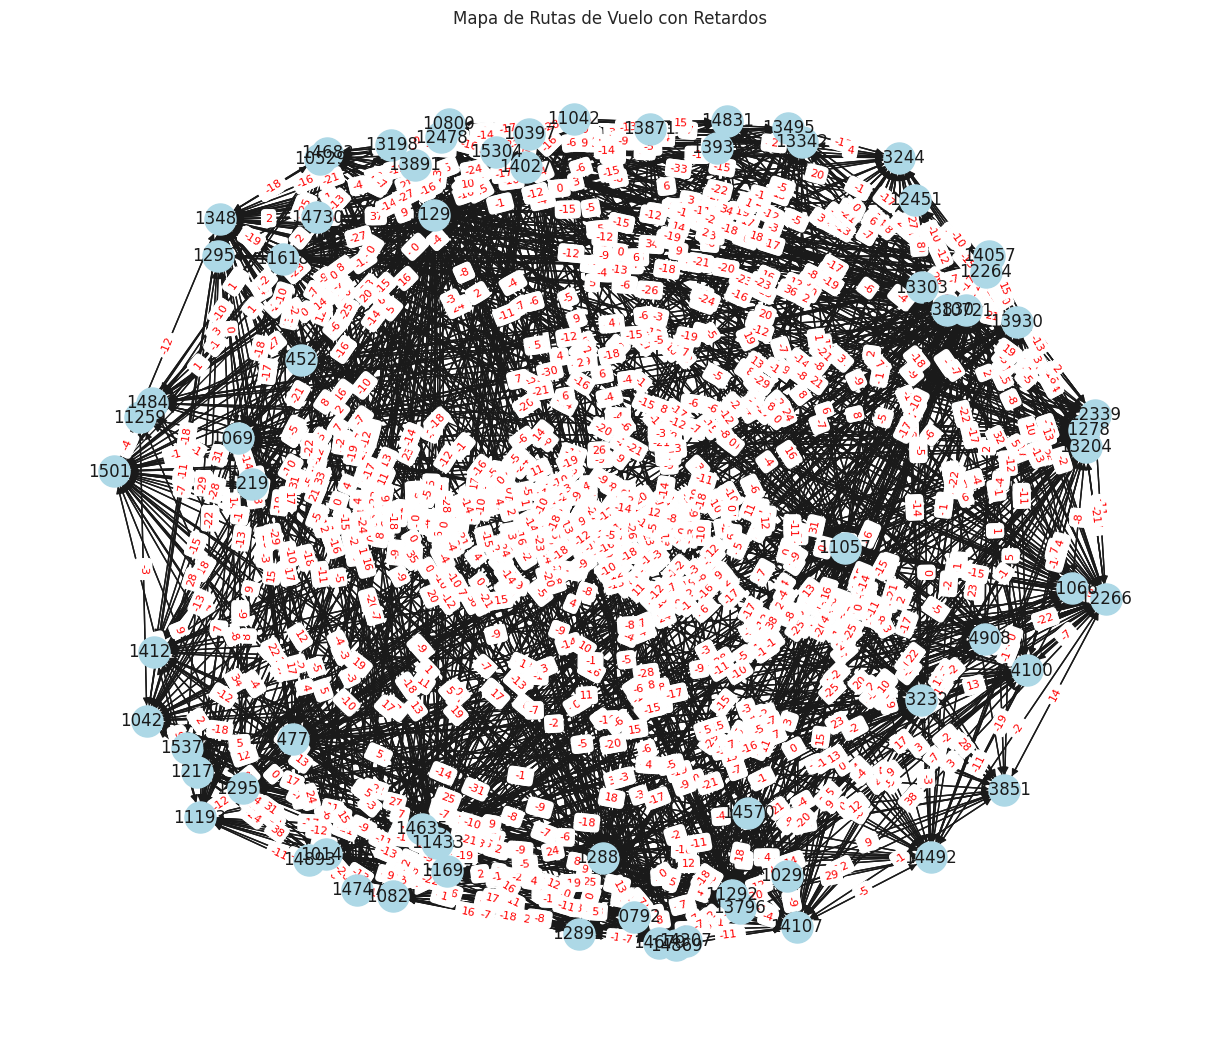

El aeropuerto con más retrasos es: 13871


In [ ]:
import networkx as nx
plt.figure(figsize=(12, 10))
# Crea un grafo dirigido
G = nx.DiGraph()

# Agrega nodos (aeropuertos)
aeropuertos = set()
for ruta in rutas:
    aeropuertos.add(ruta['OriginAirportID'])
    aeropuertos.add(ruta['DestAirportID'])
G.add_nodes_from(aeropuertos)

# Agrega aristas (rutas) con pesos basados en los retrasos
for ruta in rutas:
    origen = ruta['OriginAirportID']
    destino = ruta['DestAirportID']
    retardo = ruta['ArrDelay']
    G.add_edge(origen, destino, weight=retardo)

# Calcula el aeropuerto con más retrasos
aeropuerto_con_mas_retrasos = max(aeropuertos, key=lambda aeropuerto: sum(G[vecino][aeropuerto]['weight'] for vecino in G.predecessors(aeropuerto)))

# Dibuja el grafo
pos = nx.spring_layout(G)
edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges()}
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)
plt.title('Mapa de Rutas de Vuelo con Retardos')
plt.show()

print(f"El aeropuerto de destino con más retrasos es: {aeropuerto_con_mas_retrasos} osea el aeropuerto Eppley Airfield")

In [ ]:
retraso_total_por_aeropuerto_origen = {}

# Diccionario para contar el número de vuelos desde cada aeropuerto de origen
num_vuelos_por_aeropuerto_origen = {}

# Calcula el retraso total y el número de vuelos desde cada aeropuerto de origen
for u, v, data in G.edges(data=True):
    retraso = data['weight']
    if u not in retraso_total_por_aeropuerto_origen:
        retraso_total_por_aeropuerto_origen[u] = 0
        num_vuelos_por_aeropuerto_origen[u] = 0
    retraso_total_por_aeropuerto_origen[u] += retraso
    num_vuelos_por_aeropuerto_origen[u] += 1

# Encuentra el aeropuerto de origen con el mayor retraso total en las llegadas
aeropuerto_origen_con_mas_retrasos = max(retraso_total_por_aeropuerto_origen, key=lambda aeropuerto: retraso_total_por_aeropuerto_origen[aeropuerto])

print(f"El aeropuerto de origen con más retrasos en las llegadas es: {aeropuerto_origen_con_mas_retrasos} osea el  McCarran International")

El aeropuerto de origen con más retrasos en las llegadas es: 12889 osea el  McCarran International


# ¿Qué ruta tiene el mayor retraso medio de llegada?

In [ ]:
retraso_total_por_ruta = {}

# Diccionario para contar el número de vuelos en cada ruta
num_vuelos_por_ruta = {}

# Calcula el retraso total y el número de vuelos en cada ruta
for u, v, data in G.edges(data=True):
    retraso = data['weight']
    if (u, v) not in retraso_total_por_ruta:
        retraso_total_por_ruta[(u, v)] = 0
        num_vuelos_por_ruta[(u, v)] = 0
    retraso_total_por_ruta[(u, v)] += retraso
    num_vuelos_por_ruta[(u, v)] += 1

# Calcula el retraso medio de llegada para cada ruta
retraso_medio_por_ruta = {}
for ruta, retraso_total in retraso_total_por_ruta.items():
    num_vuelos = num_vuelos_por_ruta[ruta]
    retraso_medio = retraso_total / num_vuelos
    retraso_medio_por_ruta[ruta] = retraso_medio

# Encuentra la ruta con el mayor retraso medio de llegada
ruta_con_maximo_retraso_medio = max(retraso_medio_por_ruta, key=lambda ruta: retraso_medio_por_ruta[ruta])

# Imprime la ruta con el mayor retraso medio
print("La ruta con el mayor retraso medio de llegada es:", ruta_con_maximo_retraso_medio)
print("Retraso medio de llegada en esta ruta:", retraso_medio_por_ruta[ruta_con_maximo_retraso_medio])
print('Osea del aeropuerto Seattle/Tacoma International a Honolulu International')

La ruta con el mayor retraso medio de llegada es: (14747, 12173)
Retraso medio de llegada en esta ruta: 38.0
Osea del aeropuerto Seattle/Tacoma International a Honolulu International
